**Brian Blaylock**  
*July 20, 2021*

# HRRR-Alaska Data

There are different products available on the cloud.

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

/p/home/blaylock/BB_python/Carpenter_Workshop/toolbox/cartopy_tools_OLD.py:37: UserWarning: Migrate to new `cartopy_tools` for latest updates and features.
  warnings.warn("Migrate to new `cartopy_tools` for latest updates and features.")
/p/home/blaylock/BB_python/Carpenter_Workshop/toolbox/cartopy_tools.py:38: UserWarning: Migrate to `cartopy_tools2` for latest updates and features.
  warnings.warn("Migrate to `cartopy_tools2` for latest updates and features.")
/p/home/blaylock/BB_python/Carpenter_Workshop/toolbox/cartopy_tools.py:1015: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  class xr_to_cartopy:


In [2]:
H = Herbie('2021-07-19', 
           model='hrrrak', 
           product='sfc')

🏋🏻‍♂️ Found 2021-Jul-19 00:00 UTC F00 [HRRRAK] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [61]:
x = H.xarray('TMP:2 m above')

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:733: UserWarning: the grib file might not have enough info to parse grid_mapping
  warnings.warn(


/p/home/blaylock/anaconda3/envs/herbie/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


Text(0.0, 1.0, 'HRRRAK: 2D surface level fields; 3-km resolution')

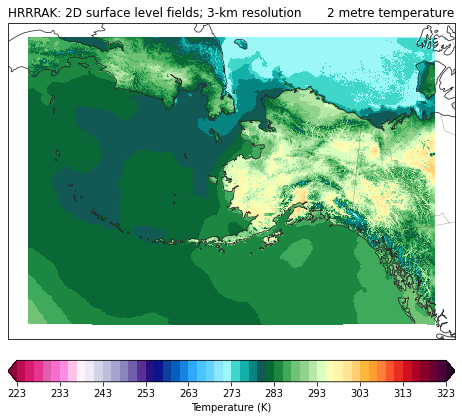

In [4]:
ax = common_features('50m', crs=x.herbie.crs, figsize=[8,8]).STATES().ax
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc='left')

In [5]:
x.t2m.attrs

{'GRIB_paramId': 167,
 'GRIB_dataType': 'fc',
 'GRIB_numberOfPoints': 1193781,
 'GRIB_typeOfLevel': 'heightAboveGround',
 'GRIB_stepUnits': 1,
 'GRIB_stepType': 'instant',
 'GRIB_gridType': 'polar_stereographic',
 'GRIB_NV': 0,
 'GRIB_cfName': 'air_temperature',
 'GRIB_cfVarName': 't2m',
 'GRIB_gridDefinitionDescription': 'Polar stereographic can be south or north',
 'GRIB_missingValue': 9999,
 'GRIB_name': '2 metre temperature',
 'GRIB_parameterName': 'Temperature ',
 'GRIB_parameterUnits': 'K',
 'GRIB_shortName': '2t',
 'GRIB_stepRange': '0',
 'GRIB_units': 'K',
 'long_name': '2 metre temperature',
 'units': 'K',
 'standard_name': 'air_temperature',
 'grid_mapping': 'hrrrak_projection'}

Below is tying to use metpy to parse the CF grid_namming

In [62]:
# my own implementation to get cartopy projection
x.herbie.crs.proj4_params

{'ellps': 'WGS84',
 'proj': 'stere',
 'lat_0': 90,
 'lon_0': -135,
 'x_0': 0.0,
 'y_0': 0.0}

In [63]:
x.metpy.parse_cf().metpy_crs.item().to_cartopy().proj4_params

{'ellps': 'sphere',
 'proj': 'stere',
 'lat_0': 90,
 'lon_0': 'not enough info',
 'x_0': 0,
 'y_0': 0,
 'lat_ts': 'not enough info'}

In [65]:
# What if I don't specify anything?
x.hrrrak_projection.attrs['straight_vertical_longitude_from_pole'] = None
x.hrrrak_projection.attrs['standard_parallel'] = None
x.hrrrak_projection.attrs['latitude_of_projection_origin'] = 90


In [66]:
x.metpy.parse_cf().metpy_crs.item().to_cartopy()

In [67]:
x.metpy.parse_cf().metpy_crs.item().to_cartopy().proj4_params

{'ellps': 'sphere',
 'proj': 'stere',
 'lat_0': 90,
 'lon_0': None,
 'x_0': 0,
 'y_0': 0}

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


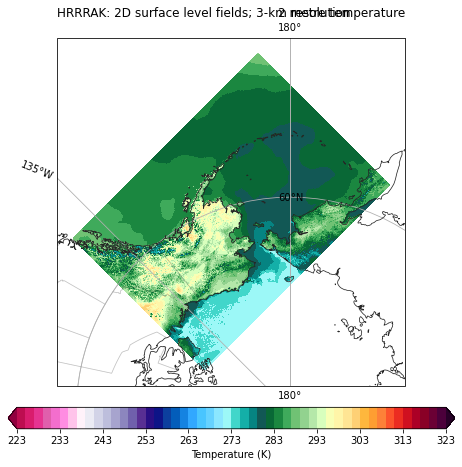

In [59]:
ax = common_features('50m', crs=x.metpy.parse_cf().metpy_crs.item().to_cartopy(), figsize=[8,8]).STATES().ax
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{x.model.upper()}: {H.product_description}", loc='left')
gl = ax.gridlines(draw_labels=True)

from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import matplotlib.ticker as mticker
gl.ylocator = mticker.FixedLocator([60])
gl.xlocator = mticker.FixedLocator([-180, -135, 180])